# 39 ML Project - Forest Fire Prediction - End to End

In [1]:
# file from https://archive.ics.uci.edu/ml/machine-learning-databases/00547/

In [354]:
import pandas as pd

In [355]:
raw_data=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

In [356]:
raw_data

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


#####                  Looking at the data above , it seems header row is not proper.. lets fix that first

In [357]:
# remove the top header 
temp_df = pd.DataFrame(raw_data)
temp_df.to_csv('Algerian_forest_fires_dataset_UPDATE1.csv', header=False)

In [358]:
full_df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE1.csv')
full_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [359]:
# 1. check how many data
full_df.shape

(246, 14)

# 
Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

In [360]:
# 2. Get te summary of teh data
full_df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,07,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [361]:
# checking teh info of each col
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


##### By lookign at teh describe and info cell, it seems there is inconsistancy with number of records or missing records. lets dig that

In [362]:
# findout the problem records
full_df['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

#### looking at above results, it seems there are 2 rows with bad, lets remove those 2 bad records

In [363]:
# remove the 1st bad record
full_df = full_df[full_df['day'] != 'Sidi-Bel Abbes Region Dataset'] 

In [364]:
# remove the next bad record
full_df = full_df[full_df['day'] != 'day']

##### Now lets check if all rows looks good

In [365]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


#### looking at above info results, there is still some inconsistancies, lets try to find why Classes column has only 243 records

In [366]:
print(full_df.to_string())

    day month  year Temperature  RH  Ws Rain   FFMC   DMC      DC   ISI   BUI      FWI      Classes  
0    01    06  2012          29  57  18     0  65.7   3.4     7.6   1.3   3.4      0.5    not fire   
1    02    06  2012          29  61  13   1.3  64.4   4.1     7.6     1   3.9      0.4    not fire   
2    03    06  2012          26  82  22  13.1  47.1   2.5     7.1   0.3   2.7      0.1    not fire   
3    04    06  2012          25  89  13   2.5  28.6   1.3     6.9     0   1.7        0    not fire   
4    05    06  2012          27  77  16     0  64.8     3    14.2   1.2   3.9      0.5    not fire   
5    06    06  2012          31  67  14     0  82.6   5.8    22.2   3.1     7      2.5        fire   
6    07    06  2012          33  54  13     0  88.2   9.9    30.5   6.4  10.9      7.2        fire   
7    08    06  2012          30  73  15     0  86.6  12.1    38.3   5.6  13.5      7.1        fire   
8    09    06  2012          25  88  13   0.2  52.9   7.9    38.8   0.4  10.5     

### After looking each and every record , it seems row 167 has data displacement issue, lets fix that

In [367]:
# checking for null
full_df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [368]:
full_df = full_df.fillna('fire') 

In [369]:
# checking for null
full_df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [370]:
## grab the value that has wrong value
print(full_df.iloc[165,12]) 

# take the records above the wrong record and convert to float
df_FWI_half1 = full_df.iloc[1:164,12].astype(float)  
df_FWI_half1

# take the records below the wrong record and convert to float
df_FWI_half2 = full_df.iloc[166:,12].astype(float)
df_FWI_half2

# create a temp df to conconatente teh float version of FWI column and get the mean
df_FWI = df_FWI_half1.append(df_FWI_half2)
df_FWI.mean()


fire   


7.072199170124484

In [371]:
# change the value from fire to mean of the FWI column
full_df.iloc[165,12:13] = '7.07'
full_df.iloc[165:166,]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,7.07,fire


In [372]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


##### now teh dat alooks good, lets convert all object variables to int or flow

In [373]:
full_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
# Row # 167 is currepted, better to drop it
full_df.drop(167,inplace=True)

In [404]:
#full_df.columns
int_columns = ['day','month','year','Temperature',' RH',' Ws']
float_columns = ['Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']
for column in int_columns:
    full_df[column] = full_df[column].astype(int)

for column in float_columns:
    full_df[column] = full_df[column].astype(float)

In [406]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4    RH          243 non-null    int32  
 5    Ws          243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 22.8+ KB


In [400]:
#full_df[full_df['FWI'] == '14']


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
60,31,7,2012,35,64,17,0.0,87.2,31.9,145.7,6.8,41.2,15.7,fire
81,21,8,2012,36,58,19,0.0,88.6,29.6,141.1,9.2,38.8,18.4,fire
132,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire
138,15,6,2012,28,90,15,0.0,66.8,7.2,14.7,1.2,7.1,0.6,not fire
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,7.07,fire
208,24,8,2012,35,38,15,0.0,92.1,51.3,147.7,12.2,54.9,26.9,fire
213,29,8,2012,35,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,fire


In [402]:
full_df.drop(167,inplace=True)

In [407]:
full_df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [408]:
full_df['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [411]:
full_df['Classes  ']=full_df['Classes  '].map({'not fire   ':'0', 'fire   ':'1', 'fire':'1', 'fire ':'1', 'not fire':'0', 'not fire ':'0',
       'not fire     ':'0', 'not fire    ':'0'})

In [415]:
full_df['Classes  '].astype(int).unique()

array([0, 1])

In [432]:
# also fix header names, which has plenty of spaces in between
full_df.rename(columns={' RH':'RH',' Ws':'Ws', 'Rain ':'Rain','Classes  ':'Classes'},inplace=True)

In [433]:
full_df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [483]:
full_df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
245,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [517]:
# create saparate dataframe for regerssion model
reg_df = full_df.loc[:,'day':'Temperature']
reg_df

,day,month,year,Temperature
0,1,6,2012,29
1,2,6,2012,29
2,3,6,2012,26
3,4,6,2012,25
4,5,6,2012,27
...,...,...,...,...
241,26,9,2012,30
242,27,9,2012,28
243,28,9,2012,27
244,29,9,2012,24


In [518]:
clss_df=full_df.loc[:,'RH':'Classes']
clss_df

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...
241,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
242,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
243,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
244,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


### EDA for Regression dataset

In [519]:
reg_df['year'].unique()

array([2012])

In [520]:
# we can drop this column, as just one value, doesn't need it for model
reg_df.drop('year',axis=1,inplace=True)
reg_df

,day,month,Temperature
0,1,6,29
1,2,6,29
2,3,6,26
3,4,6,25
4,5,6,27
...,...,...,...
241,26,9,30
242,27,9,28
243,28,9,27
244,29,9,24


In [521]:
# drop duplicate City name , keeping one with highest population
reg_df.drop_duplicates(['day','month','Temperature'],keep='last',inplace=True)
reg_df

,day,month,Temperature
0,1,6,29
1,2,6,29
2,3,6,26
3,4,6,25
4,5,6,27
...,...,...,...
241,26,9,30
242,27,9,28
243,28,9,27
244,29,9,24


In [552]:
# now we have have data ready for creating the model , lets do that
# lets saparate the indpendent variabel from dependents one
X = reg_df.iloc[:,0:-1]
y = reg_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [553]:
# Linear Regression with cross validation
from sklearn.linear_model import LinearRegression
regressor=LinearRegression() # create object

In [555]:
# Cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

# do the cross validation
mse=cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)  # we can use different type of scoring
mse

np.mean(mse)  # thsi is averge of all mean sq error

-14.09823433566227

In [557]:
# lets do the predication
# using the X_test , lets do the predication
regressor.fit(X_train,y_train)
predication_linear=regressor.predict(X_test)
predication_linear


array([31.56237144, 31.31223543, 32.19963394, 32.06769666, 31.64117059,
       31.98202823, 31.90322908, 32.26469454, 31.7062312 , 31.47670301,
       31.7987689 , 31.76623859, 31.67370089, 31.9238369 , 32.47543097,
       31.52297186, 32.17902612, 31.80563817, 32.15336509, 32.38976254,
       31.79189962, 31.64803986, 31.58803247, 32.17902612, 31.68743944,
       31.63430132, 32.15336509, 31.87756805, 32.12083478, 31.71996974,
       31.87069878, 32.75122801, 32.22529497, 32.62616   , 31.78503035,
       32.43603139, 32.31783266, 31.91009835, 31.88443732, 32.02142781,
       31.50923331, 31.66683162, 31.83816847, 32.67242885, 31.66683162,
       31.39103458, 31.71996974, 31.98889751, 32.19276466, 31.46983374,
       32.376024  , 31.9563672 , 32.30409412, 32.30409412, 32.35723224,
       32.71182843, 31.72683902, 32.4685617 , 31.62743204, 32.5936297 ,
       31.43730343, 32.23216424, 32.19276466, 32.18589539, 31.76623859,
       32.29722485, 31.55550216, 31.60864029, 32.4685617 ])

In [558]:
### Lets check teh performance metric
from sklearn.metrics import r2_score
r2_score(y_test,predication_linear)  ## value close to 1 is good predication


-0.006391304173561263

C:\Users\KHURAMKHAN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

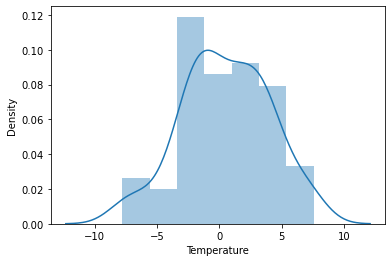

In [559]:
### Comparing predicated with actual values
import seaborn as sns
sns.distplot(y_test-predication_linear)  # distance plot
# y test will have actual truth value that we minus with preciation value

In [570]:
# lets do one predication
mytest = {'day':26 ,'month':9}

mydict = pd.DataFrame([mytest])
type(mydict)
predication_linear=regressor.predict(mydict)
predication_linear

array([32.21842569])

### Ridge Regerssion

In [595]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [596]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge

Ridge()

In [597]:
# find the alpha,
from sklearn.model_selection import GridSearchCV

#find the suitiable value for alpha, by creating dic with low to high value
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

# we are trying to select best alpha from the above dic, so that gridsearch will play with this parameters annd get teh best one
ridge_regerssor=GridSearchCV(regerssion_ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regerssor.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [598]:
# after teh fit, we need to know what alpha is best
# for that do
print(ridge_regerssor.best_params_)
print(ridge_regerssor.best_score_)


{'alpha': 100}
-14.061458515555728


In [599]:
# using the X_test , lets do the predication
predication_ridge=ridge_regerssor.predict(X_test)


C:\Users\KHURAMKHAN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

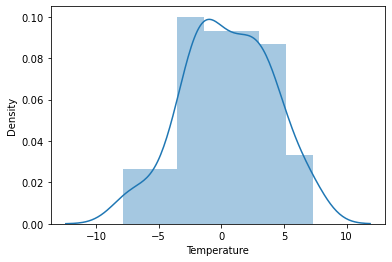

In [600]:
#### Comparing predicated with actual values
import seaborn as sns
sns.distplot(y_test-predication_ridge)  # distance plot
# y test will have actual truth value that we minus with preciation value

In [601]:
### Lets check teh performance metric
from sklearn.metrics import r2_score
r2_score(y_test,predication_ridge)  ## value close to 1 is good predication

-0.007560069135689185

In [602]:
# lets do one predication
mytest = {'day':26 ,'month':9}

mydict = pd.DataFrame([mytest])
type(mydict)
predication_linear=regressor.predict(mydict)
predication_linear

array([32.21842569])

In [584]:
### Lasso Regression
# Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso()

In [603]:
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [604]:
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\KHURAMKHAN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.155022034585272, tolerance: 0.1801212598425197
  model = cd_fast.enet_coordinate_descent(
C:\Users\KHURAMKHAN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.832054409903094, tolerance: 0.17043622047244095
  model = cd_fast.enet_coordinate_descent(
C:\Users\KHURAMKHAN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.844151248117214, tolerance: 0.1703937007874016
  model = cd_fast.enet_coordinate_descent(
C:\Users\KHURAMKHAN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.

{'alpha': 1}
-14.091347409232904


In [629]:
# using the X_test , lets do the predication
yhat_train = lasso_regressor.predict(X_train)  # thsi for grpah below
predication_lasso=lasso_regressor.predict(X_test)

C:\Users\KHURAMKHAN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

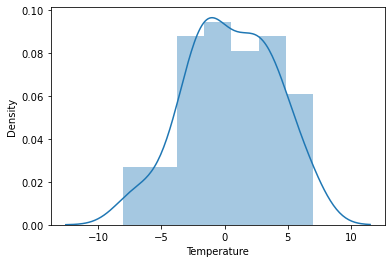

In [631]:
## lets compare predicated with actual values
import seaborn as sns
sns.distplot(y_test-predication_lasso)  # distance plot

In [632]:
### Lets check teh performance metric
from sklearn.metrics import r2_score
r2_score(y_test,predication_lasso)   ## Value close to 1 indicate good predication

-0.01600825838321973

In [633]:
# lets do one predication
mytest = {'day':26 ,'month':9}

mydict = pd.DataFrame([mytest])
type(mydict)
predication_linear=regressor.predict(mydict)
predication_linear

array([32.21842569])

## lets do teh classification on secodn dataframe

In [638]:
full_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [660]:
#lets us create X and Y dataframe
X = full_df.iloc[:,0:-1] 
X.drop(['year'],inplace=True,axis=1)  # indpendent variabe

#y = full_df.iloc[:,-1:-1] # dependent variables
y=full_df.iloc[:,-1]  ## should be pandas series


In [661]:
# letsdo teh scaler function on this
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [662]:
# SVM kernel for classification
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
y_train.shape

(182,)

In [676]:
# Train the model using rbf
from sklearn.svm import SVC
classifier=SVC(kernel="linear")   ## tried with rbf, poly, linear, but linears tends to give good acuracy
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [677]:
y_pred = classifier.predict(X_test)
y_pred

array(['1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1',
       '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1',
       '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1',
       '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1',
       '0', '0', '1', '0', '1', '0', '0', '1', '1'], dtype=object)

In [678]:
# Check ther performance
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9344262295081968

## Decsion tree classification

In [746]:
from sklearn.tree import DecisionTreeClassifier


In [747]:
DTclassifier=DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTclassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [748]:
y_pred = DTclassifier.predict(X_test)
y_pred

array(['1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1',
       '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1',
       '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1',
       '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1',
       '0', '0', '1', '0', '1', '1', '0', '1', '1'], dtype=object)

In [749]:
# Check ther performance
from sklearn.metrics import accuracy_score
y_pred = DTclassifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9508196721311475

In [750]:
# Check the confusion matrix
def perf_measure(y_test_array,y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    print(len(y_pred))
    for i in range(len(y_pred)): 
        #print(type(y_test_array[i]))
        if int(y_test_array[i]) == int(y_pred[i]) == 1:
            TP += 1
        if int(y_pred[i]==1) and int(y_test_array[i]) != int(y_pred[i]):
            FP += 1
        if int(y_test_array[i]) == int(y_pred[i]) == 0:
            TN += 1
        if int(y_pred[i]) == 0 and int(y_test_array[i]) != int(y_pred[i]):
            FN += 1

    print('True Positive ',TP)
    print('False Positive ',FP)
    print('True Negative ',TN)
    print('False Negative ',FN)
    #return(TP, FP, TN, FN)

61
True Positive  32
False Positive  0
True Negative  26
False Negative  3


<AxesSubplot:>

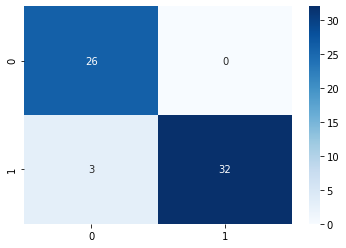

In [751]:
perf_measure(y_test_array,y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_array, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues')

#### Confusion matrix shows very less number of false negative and zero false positive.. which means we try to minimize False negative as false neagtive means there is a frire, but we are saying no fire thats lil bad

## KNN Classification

In [738]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [739]:
y_pred = neigh.predict(X_test)

In [741]:
# lets us check the acuracy
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))


Train set Accuracy:  0.9505494505494505
Test set Accuracy:  0.8360655737704918


In [744]:
# lets find out the best K value
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];

for n in range(1,Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    print(" ")
    print('for K value ', n)
    print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
mean_acc



 
for K value  1
Train set Accuracy:  1.0
Test set Accuracy:  0.819672131147541
 
for K value  2
Train set Accuracy:  0.9615384615384616
Test set Accuracy:  0.7868852459016393
 
for K value  3
Train set Accuracy:  0.9725274725274725
Test set Accuracy:  0.8852459016393442
 
for K value  4
Train set Accuracy:  0.9505494505494505
Test set Accuracy:  0.8360655737704918
 
for K value  5
Train set Accuracy:  0.9395604395604396
Test set Accuracy:  0.8852459016393442
 
for K value  6
Train set Accuracy:  0.9285714285714286
Test set Accuracy:  0.8032786885245902
 
for K value  7
Train set Accuracy:  0.9010989010989011
Test set Accuracy:  0.8852459016393442
 
for K value  8
Train set Accuracy:  0.9120879120879121
Test set Accuracy:  0.8688524590163934
 
for K value  9
Train set Accuracy:  0.8956043956043956
Test set Accuracy:  0.8852459016393442


array([0.81967213, 0.78688525, 0.8852459 , 0.83606557, 0.8852459 ,
       0.80327869, 0.8852459 , 0.86885246, 0.8852459 ])

#### Looking at above acuracy, the model is performing well with K = 3, however decsion tree model has best acurac out of all so lets build the pickle file with decsion tree model

## Pickle file creation

In [745]:
import pickle
pickle.dump(DTclassifier,open('DTmodel.pkl','wb'))  # wb: write byte mode


In [752]:
# if we want to load the pickle file , and read
pickled_model=pickle.load(open('DTmodel.pkl','rb'))
pickled_model.predict(X_test)  ## this is batch i/p and getting batch o/p 

array(['1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1',
       '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1',
       '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1',
       '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1',
       '0', '0', '1', '0', '1', '1', '0', '1', '1'], dtype=object)

In [ ]:
## now lets go to the pycharm to build the FLASK API for deployment of this model

array([32.21842569])

### The below work is just additioal work on data visualization 

### Data visualization

In [429]:
# lets do the box plot to check any outliers
import matplotlib as plt

<AxesSubplot:>

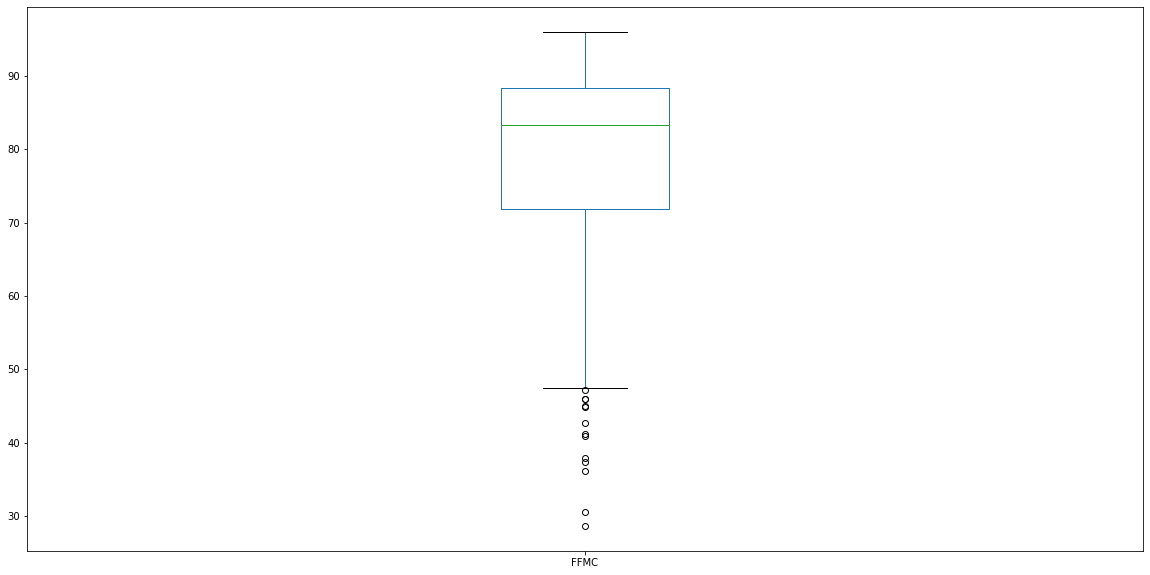

In [449]:
full_df['FFMC'].plot(kind='box',figsize=(20,10))

In [448]:
full_df.groupby('Rain').count()

,day,month,year,Temperature,RH,Ws,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Rain,,,,,,,,,,,,,
0.0,133,133,133,133,133,133,133,133,133,133,133,133,133
0.1,18,18,18,18,18,18,18,18,18,18,18,18,18
0.2,11,11,11,11,11,11,11,11,11,11,11,11,11
0.3,10,10,10,10,10,10,10,10,10,10,10,10,10
0.4,8,8,8,8,8,8,8,8,8,8,8,8,8
0.5,5,5,5,5,5,5,5,5,5,5,5,5,5
0.6,6,6,6,6,6,6,6,6,6,6,6,6,6
0.7,6,6,6,6,6,6,6,6,6,6,6,6,6
0.8,2,2,2,2,2,2,2,2,2,2,2,2,2


In [447]:
full_df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521


C:\Users\KHURAMKHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


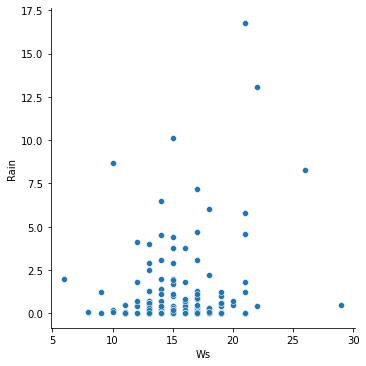

In [475]:
import seaborn as sns
sns.relplot('Ws','Rain',data=full_df)

#### Looking at the graph above , if there is a a rain, then no fre, and if there is no rain , then Fire possibility there

C:\Users\KHURAMKHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ws', ylabel='Classes'>

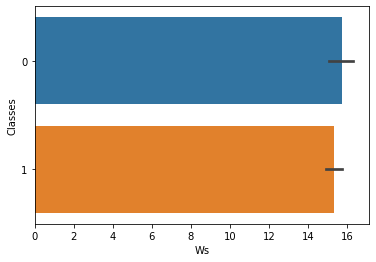

In [455]:
sns.barplot('Ws','Classes',data=full_df)

In [469]:
from pandas_profiling import ProfileReport
profile = ProfileReport(full_df, title="Pandas Profiling Report")
profile.to_file("Rain_report.html")